In [1]:
library(Seurat)
library(dplyr)
library(future)

set.seed(1515)
options(future.globals.maxSize = 80000 * 1024^2)
plan("multicore", workers = 16)
plan()

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




multicore:
- args: function (..., workers = 16, envir = parent.frame())
- tweaked: TRUE
- call: plan("multicore", workers = 16)

In [2]:
harmony <- readRDS("/workdir/wangph/proj/20220418_TB/SC/5.seurat/v7-12sample-normal/2.2.merged-harmony-processed-nodoublet-20220812.rds")

In [3]:
head(harmony@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample,library,patient,tissue,pathogen,percent.mt,percent.rb,⋯,RNA_snn_res.0.6,RNA_snn_res.0.8,RNA_snn_res.1,RNA_snn_res.1.2,RNA_snn_res.1.5,RNA_snn_res.1.8,RNA_snn_res.2,RNA_snn_res.2.5,RNA_snn_res.3,seurat_clusters
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
159611-S3_AAACCCAAGAGAAGGT-1,SeuratProject,13578,3127,159611-S3,S3,159611,Lung,TB,3.542495,9.169244,⋯,7,6,6,13,13,10,11,11,9,9
159611-S3_AAACCCAAGCATAGGC-1,SeuratProject,2379,1220,159611-S3,S3,159611,Lung,TB,1.849517,18.831442,⋯,3,3,2,2,18,32,21,7,18,18
159611-S3_AAACCCAAGGCGATAC-1,SeuratProject,5104,1468,159611-S3,S3,159611,Lung,TB,1.900470,28.369906,⋯,6,7,8,9,33,36,34,36,33,33
159611-S3_AAACCCACACTGCATA-1,SeuratProject,36200,4783,159611-S3,S3,159611,Lung,TB,3.209945,9.475138,⋯,9,10,10,8,17,15,18,20,21,21
159611-S3_AAACCCACATCCTGTC-1,SeuratProject,3813,1461,159611-S3,S3,159611,Lung,TB,3.829006,1.022817,⋯,25,27,22,34,38,41,43,48,57,57
159611-S3_AAACCCACATTGTGCA-1,SeuratProject,3373,1368,159611-S3,S3,159611,Lung,TB,1.126594,23.450934,⋯,3,3,2,2,3,3,2,1,2,2


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



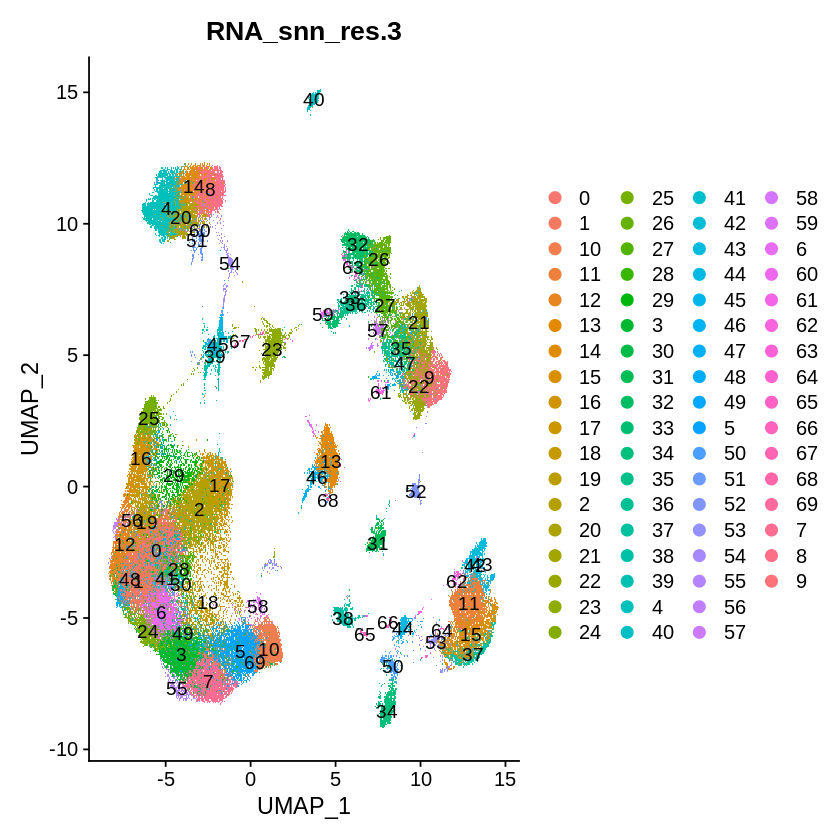

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



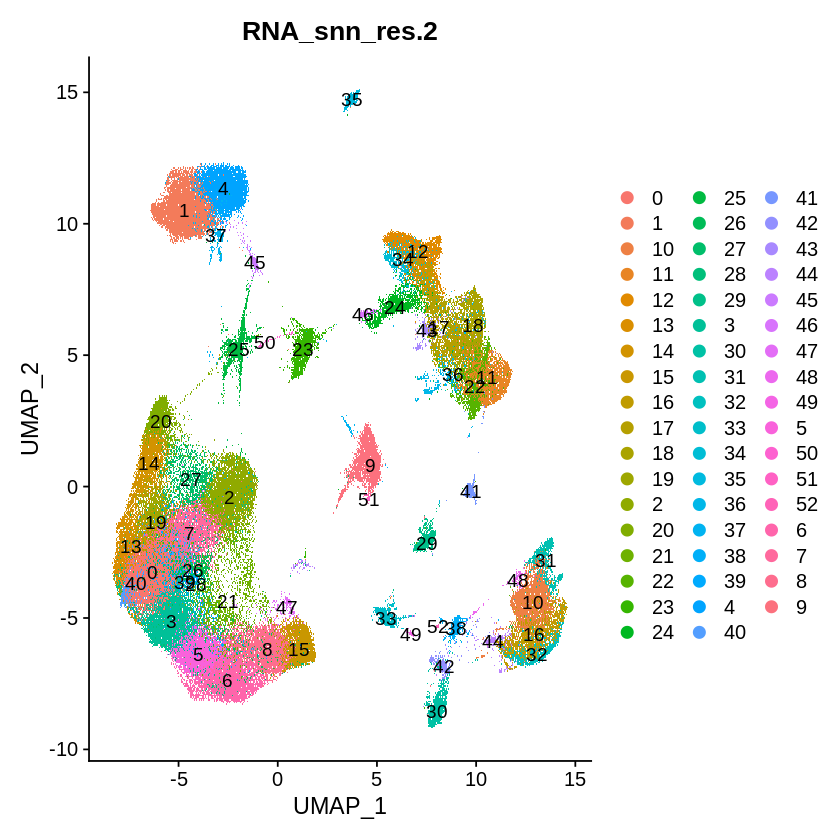

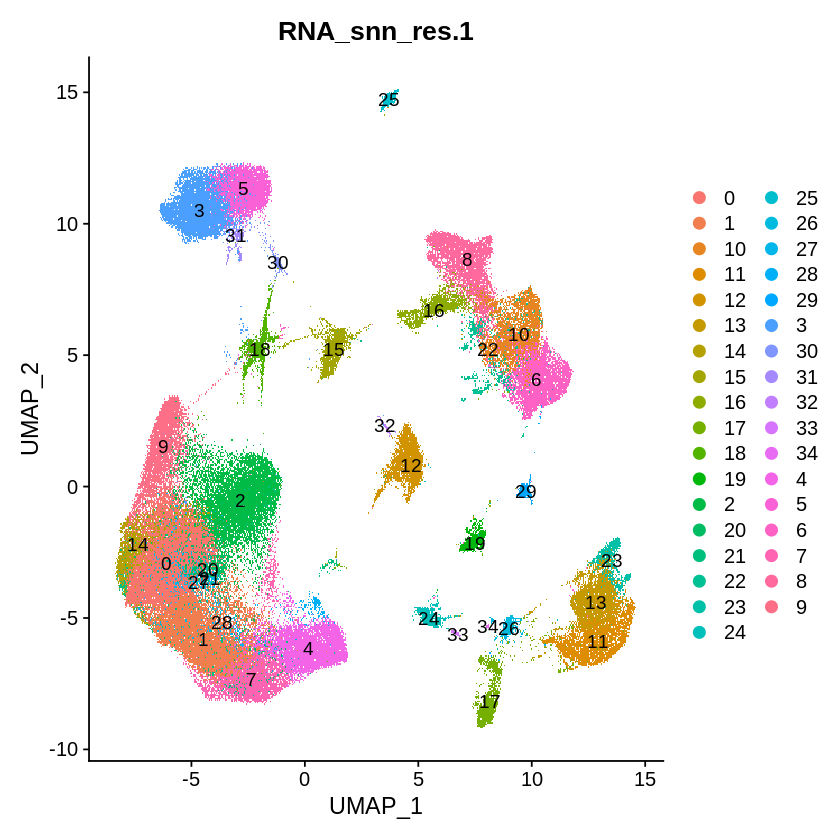

In [4]:
DimPlot(harmony, reduction = "umap", group.by = "RNA_snn_res.3", label = T)
DimPlot(harmony, reduction = "umap", group.by = "RNA_snn_res.2", label = T)
DimPlot(harmony, reduction = "umap", group.by = "RNA_snn_res.1", label = T)

In [5]:
Idents(harmony) <- harmony@meta.data$RNA_snn_res.1
levels(Idents(harmony))

# find markers for every cluster compared to all remaining cells
# report only the positive ones
harmony.markers <- FindAllMarkers(harmony, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

write.csv(harmony.markers, 
          '/workdir/wangph/proj/20220418_TB/SC/5.seurat/v7-12sample-normal/3.1.harmony-markers-res1-20220812.csv')

[1] "0"  "1"  "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "2"  "20" "21"
[16] "22" "23" "24" "25" "26" "27" "28" "29" "3"  "30" "31" "32" "33" "34" "4" 
[31] "5"  "6"  "7"  "8"  "9"

Calculating cluster 0

Calculating cluster 1

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 2

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26

Calculating cluster 27

Calculating cluster 28

Calculating cluster 29

Calculating cluster 3

Calculating cluster 30

Calculating cluster 31

Calculating cluster 32

Calculating cluster 33

Calculating cluster 34

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [6]:
Idents(harmony) <- harmony@meta.data$RNA_snn_res.2
levels(Idents(harmony))

# find markers for every cluster compared to all remaining cells
# report only the positive ones
harmony.markers <- FindAllMarkers(harmony, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

write.csv(harmony.markers, 
          '/workdir/wangph/proj/20220418_TB/SC/5.seurat/v7-12sample-normal/3.1.harmony-markers-res2-20220812.csv')

[1] "0"  "1"  "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "2"  "20" "21"
[16] "22" "23" "24" "25" "26" "27" "28" "29" "3"  "30" "31" "32" "33" "34" "35"
[31] "36" "37" "38" "39" "4"  "40" "41" "42" "43" "44" "45" "46" "47" "48" "49"
[46] "5"  "50" "51" "52" "6"  "7"  "8"  "9"

Calculating cluster 0

Calculating cluster 1

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 2

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26

Calculating cluster 27

Calculating cluster 28

Calculating cluster 29

Calculating cluster 3

Calculating cluster 30

Calculating cluster 31

Calculating cluster 32

Calculating cluster 33

Calculating cluster 34

Calculating cluster 35

Calculating cluster 36

Calculating cluster 37

Calculating cluster 38

Calculating cluster 39

Calculating cluster 4

Calculating cluster 40

Calculating cluster 41

Calculating cluster 42

Calculating cluster 43

Calculating cluster 44

Calculating cluster 45

Calculating cluster 4

In [7]:
Idents(harmony) <- harmony@meta.data$RNA_snn_res.3
levels(Idents(harmony))

# find markers for every cluster compared to all remaining cells
# report only the positive ones
harmony.markers <- FindAllMarkers(harmony, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

write.csv(harmony.markers, 
          '/workdir/wangph/proj/20220418_TB/SC/5.seurat/v7-12sample-normal/3.1.harmony-markers-res3-20220812.csv')

[1] "0"  "1"  "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "2"  "20" "21"
[16] "22" "23" "24" "25" "26" "27" "28" "29" "3"  "30" "31" "32" "33" "34" "35"
[31] "36" "37" "38" "39" "4"  "40" "41" "42" "43" "44" "45" "46" "47" "48" "49"
[46] "5"  "50" "51" "52" "53" "54" "55" "56" "57" "58" "59" "6"  "60" "61" "62"
[61] "63" "64" "65" "66" "67" "68" "69" "7"  "8"  "9"

Calculating cluster 0

Calculating cluster 1

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 2

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26

Calculating cluster 27

Calculating cluster 28

Calculating cluster 29

Calculating cluster 3

Calculating cluster 30

Calculating cluster 31

Calculating cluster 32

Calculating cluster 33

Calculating cluster 34

Calculating cluster 35

Calculating cluster 36

Calculating cluster 37

Calculating cluster 38

Calculating cluster 39

Calculating cluster 4

Calculating cluster 40

Calculating cluster 41

Calculating cluster 42

Calculating cluster 43

Calculating cluster 44

Calculating cluster 45

Calculating cluster 4